In [1]:
import pandas as pd
import numpy as np

In [7]:
URL = ('https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_')
file_id=URL.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dwn_url

'https://drive.google.com/uc?id=1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y'

In [9]:
df= pd.read_csv(dwn_url)
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


### 1. Measure the dispersion in both and interpret the results.

In [10]:
#Computing SD and Variance for Blood Pressure Before
from math import sqrt
after_mean=df[' Blood Pressure Before (mmHg)'].mean()
variance_before=0
for i in df[' Blood Pressure Before (mmHg)']:
    variance_before+=(i-after_mean)**2/len(df)
print(f'Standard deviation of Blood Pressure After {sqrt(variance_before)}')
print(f'Variance of Blood Pressure After {variance_before}')

Standard deviation of Blood Pressure After 6.565203728750541
Variance of Blood Pressure After 43.101900000000015


In [11]:
#Computing SD and Variance for Blood Pressure After
after_mean=df[' Blood Pressure After (mmHg)'].mean()
variance_after=0
for i in df[' Blood Pressure After (mmHg)']:
    variance_after+=(i-after_mean)**2/len(df)
print(f'Standard deviation of Blood Pressure After {sqrt(variance_after)}')
print(f'Variance of Blood Pressure After {variance_after}')

Standard deviation of Blood Pressure After 6.853495458523337
Variance of Blood Pressure After 46.97040000000001


### 2. Mean and 5% confidence interval and their graphs

In [12]:
mean_before=df[' Blood Pressure Before (mmHg)'].mean()
mean_after=df[' Blood Pressure After (mmHg)'].mean()

In [14]:
import scipy.stats as st
st.norm.interval(alpha=0.95,
              loc=np.mean(df),
              scale=st.sem(df))

C:\Users\HappySoul\AppData\Local\Temp\ipykernel_10124\2173829672.py:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.norm.interval(alpha=0.95,


(array([ 98.57051873, 102.96342794, 102.90663914]),
 array([109.94281461, 105.54990539, 105.60669419]))

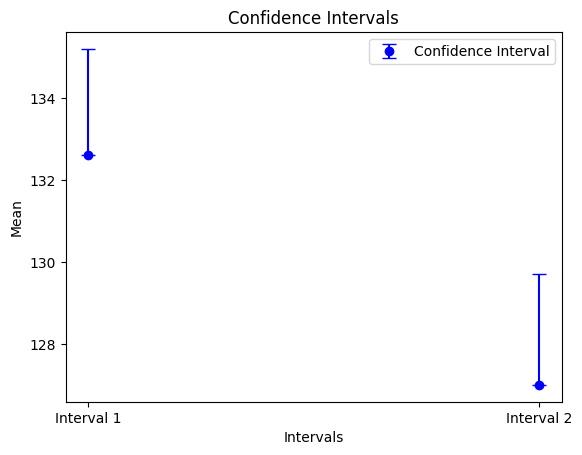

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the lower and upper bounds stored in arrays
lower_bounds = [132.61676127, 127.00997248]
upper_bounds = [135.20323873, 129.71002752]

# Plotting the confidence interval
x = np.arange(2) 
y = [lower_bounds, upper_bounds]

plt.errorbar(x, y[0], yerr=[np.subtract(y[0], lower_bounds), np.subtract(upper_bounds, y[0])],
             fmt='o', color='blue', capsize=5, label='Confidence Interval')
plt.xticks(x, ['Interval 1', 'Interval 2'])
plt.xlabel('Intervals')
plt.ylabel('Mean')
plt.title('Confidence Intervals')
plt.legend()
plt.show()

### 3. Mean absolute deviation and Standard deviation

In [16]:
mae_after=0
for i in df[' Blood Pressure After (mmHg)']:
    if i>mean_after:
        mae_after+=(i-mean_after)/len(df)
    else:
        mae_after+=(mean_after-i)/len(df)
mae_before=0
for i in df[' Blood Pressure Before (mmHg)']:
    if i>mean_after:
        mae_before+=(i-mean_before)/len(df)
    else:
        mae_before+=(mean_before-i)/len(df)
print(f'Mean absolute deviation for before column {mae_before}')        
print(f'Mean absolute deviation for after column {mae_after}')    
print(f'Standard deviation of Blood Pressure Before {sqrt(variance_before)}')   
print(f'Standard deviation of Blood Pressure After {sqrt(variance_after)}')   

Mean absolute deviation for before column 4.644200000000003
Mean absolute deviation for after column 5.900000000000003
Standard deviation of Blood Pressure Before 6.565203728750541
Standard deviation of Blood Pressure After 6.853495458523337


### 4. Correlation coefficient and check the significance of it at 1% level of significance.

In [17]:
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(df[' Blood Pressure Before (mmHg)'],df[' Blood Pressure After (mmHg)'])

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"p-value: {p_value}")

# Check significance at 1% level
alpha = 0.01
if p_value < alpha:
    print("The correlation coefficient is significant at the 1% level.")
else:
    print("The correlation coefficient is not significant at the 1% level.")

Correlation Coefficient: 0.9779485966556021
p-value: 1.8097381433059864e-68
The correlation coefficient is significant at the 1% level.
